#Handwritten Digits Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
data = tf.keras.datasets.mnist #Loads up mnist, a database that comes with tf containing lots of handwritten numbers.
(training_images, training_labels), (test_images, test_labels) = data.load_data() #Load training and validation images and their labels.
training_images = training_images/255.0
test_images = test_images/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


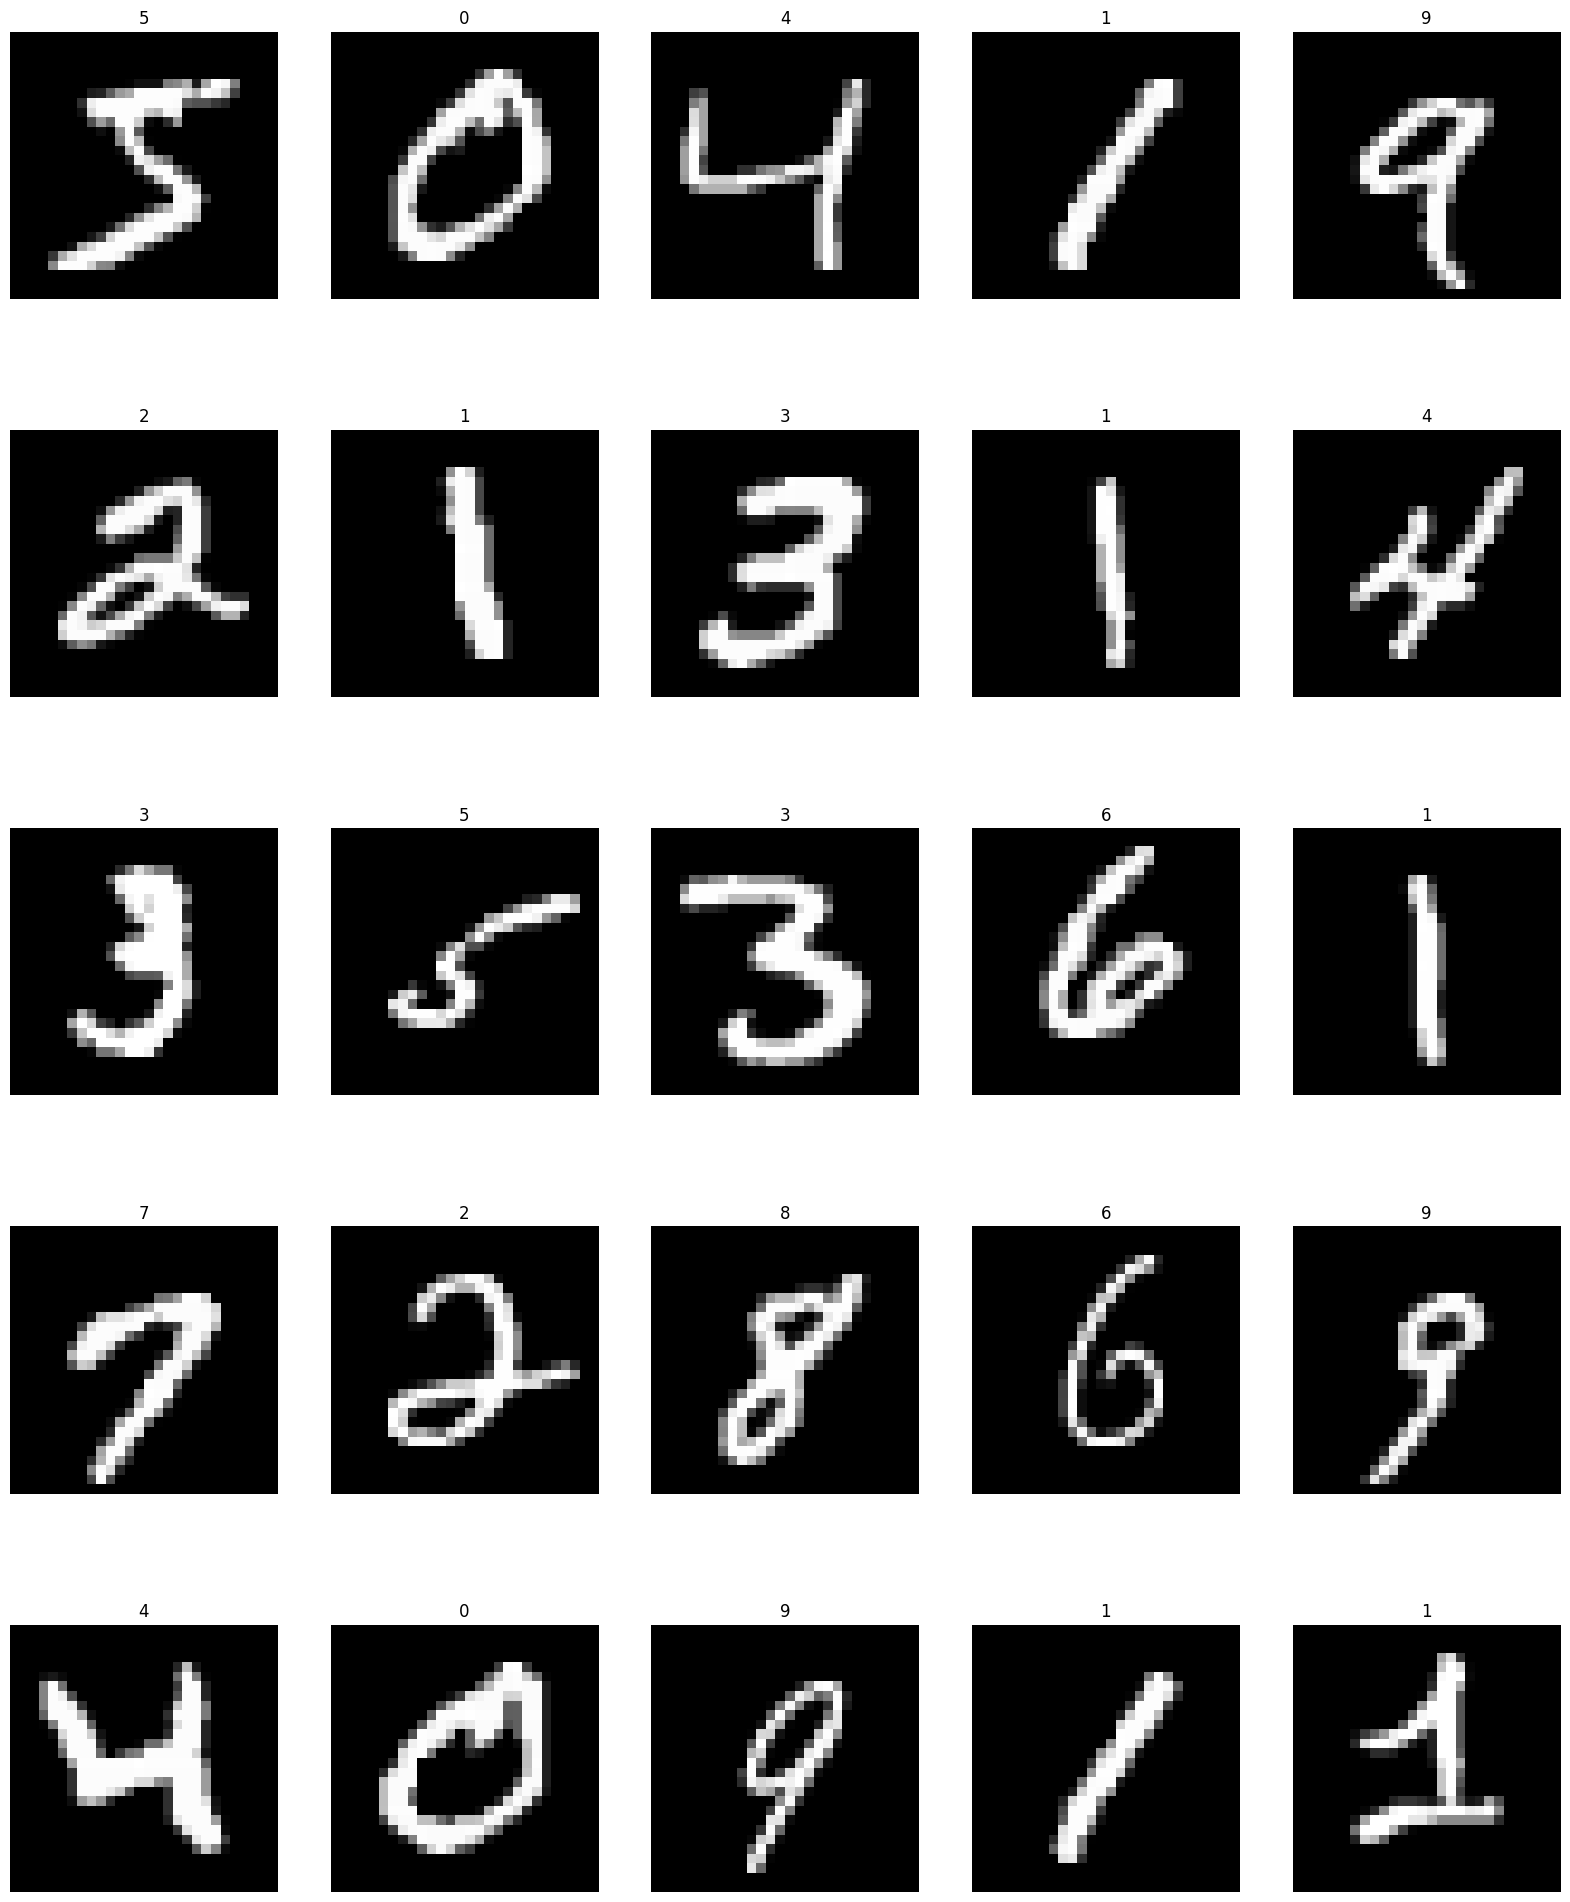

In [3]:
fig, axs = plt.subplots(5,5, figsize=(20,25))
for i in range(5):
  for a in range(5):
    axs[i,a].imshow(training_images[5*i+a], cmap='gray')
    axs[i,a].set_title(str(training_labels[5*i+a]))
    axs[i,a].axis('off')

plt.show()

In [4]:
#Create the Model object
import tensorflow.keras.layers as lay

model = tf.keras.models.Sequential([
    lay.RandomRotation(0.2, fill_mode='constant', input_shape=(28,28,1)),
    lay.RandomZoom(0.2),
    lay.Flatten(),
    lay.Dense(96, activation='relu'),
    lay.Dense(48, activation='relu'),
    lay.Dense(24, activation='relu'),
    lay.Dropout(0.2),
    lay.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │          75,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           4,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,442 (318.13 KB)

 Trainable params: 81,442 (318.13 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, validation_split=0.10, epochs=15)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9312 - loss: 0.2420 - val_accuracy: 0.9605 - val_loss: 0.1366
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9329 - loss: 0.2319 - val_accuracy: 0.9583 - val_loss: 0.1313
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9350 - loss: 0.2244 - val_accuracy: 0.9662 - val_loss: 0.1165
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9379 - loss: 0.2135 - val_accuracy: 0.9633 - val_loss: 0.1271
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9414 - loss: 0.2076 - val_accuracy: 0.9627 - val_loss: 0.1278
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9391 - loss: 0.2093 - val_accuracy: 0.9628 - val_loss: 0.1244
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9424 - loss: 0.1999 - val_accuracy: 0.9627 - val_loss: 0.1264
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9446 - loss: 0.1916 

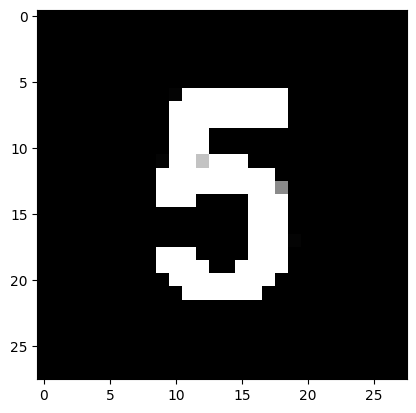

In [15]:
import os

filepath = "/content/5.png"


img = tf.keras.utils.load_img(
            filepath,
            color_mode='grayscale',
            target_size=(28,28))
img = tf.keras.utils.img_to_array(img)
img = tf.cast(img, 'float32')/255.0
ones = tf.ones_like(img)
img = tf.math.subtract(ones, img)
plt.imshow(tf.squeeze(img, axis=-1), cmap='gray')

In [16]:
def predict(image):
  results = model.predict(tf.expand_dims(image, axis=0))
  highest = np.amax(results)
  class_num = results.tolist()[0].index(highest)
  return "The image is a "+str(class_num)

print(predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is a 5
